<a href="https://colab.research.google.com/github/AbrarBorger/MLProject-Stock-Price-Prediction/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STOCK PRICE PREDICTION**

In [ ]:
# !pip install yfinance

In [ ]:

#Import libraries
import math
import yfinance as yf
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
plt.style.use('fivethirtyeight')



In [ ]:
#Get stock quote
df= yf.download("AAPL", start='2012-01-03', end='2022-12-20')
df2= yf.download("GOOGL", start='2012-01-03', end='2022-12-20')
df3 = yf.download("TSLA", start='2012-01-03', end='2022-12-20')

df
# df2
# df3

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519280,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586556,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726293,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859329,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838937,394024400
...,...,...,...,...,...,...
2022-12-13,149.500000,149.970001,144.240005,145.470001,145.470001,93886200
2022-12-14,145.350006,146.660004,141.160004,143.210007,143.210007,82291200
2022-12-15,141.110001,141.800003,136.029999,136.500000,136.500000,98931900


In [ ]:
# Get number of rows and columns
df.shape

(2760, 6)

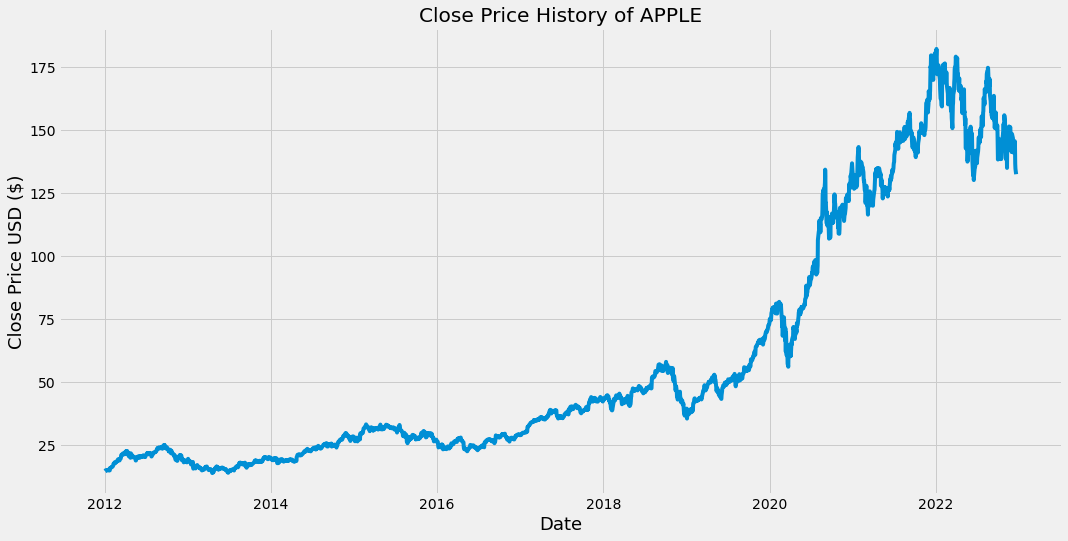

In [ ]:
#Visualize closing price history of APPLE
plt.figure(figsize = (16,8))
plt.title('Close Price History of APPLE')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)',fontsize = 18 )
plt.show()


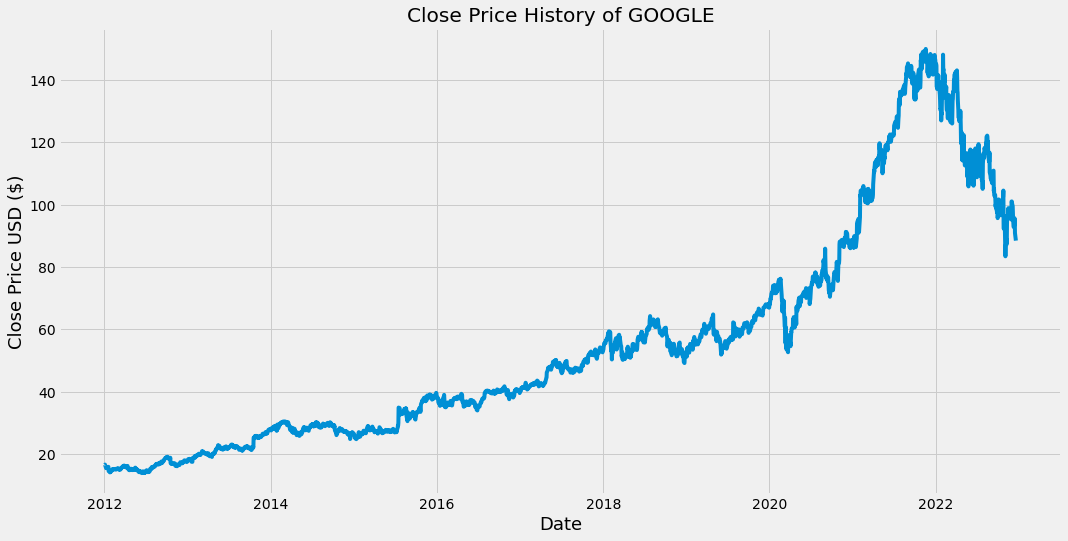

In [ ]:
#Visualize closing price history of GOOGLE
plt.figure(figsize = (16,8))
plt.title('Close Price History of GOOGLE')
plt.plot(df2['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)',fontsize = 18 )
plt.show()

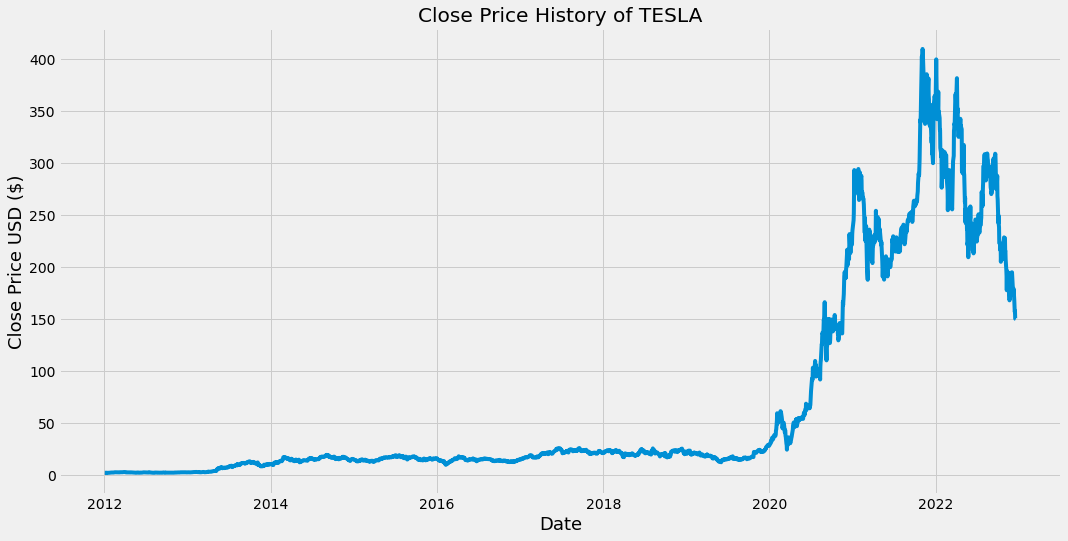

In [ ]:
#Visualize closing price history of TESLA
plt.figure(figsize = (16,8))
plt.title('Close Price History of TESLA')
plt.plot(df3['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)',fontsize = 18 )
plt.show()

In [ ]:
#New dataframe with only 'Close' column
data = df.filter(['Close'])
data2 = df2.filter(['Close'])
data3 = df3.filter(['Close'])
#Convert dataframe to numpy array
dataset = data.values
dataset2 = data2.values
dataset3 = data3.values

#Get number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8) 

training_data_len

2208

In [ ]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
scaler3 = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data2 = scaler2.fit_transform(dataset2)
scaled_data3 = scaler3.fit_transform(dataset3)
print(scaled_data)
print(scaled_data2)
print(scaled_data3)

[[0.00439887]
 [0.00486851]
 [0.00584391]
 ...
 [0.72920791]
 [0.71736704]
 [0.70463369]]
[[0.0195929 ]
 [0.0201216 ]
 [0.01841394]
 ...
 [0.56585016]
 [0.56143348]
 [0.54803618]]
[[0.00086343]
 [0.00080303]
 [0.00070674]
 ...
 [0.38229994]
 [0.36408476]
 [0.36320338]]


In [ ]:
#Create training dataset
#Create scaled training dataset
train_data = scaled_data[0:training_data_len,:]
train_data2 = scaled_data2[0:training_data_len,:]
train_data3 = scaled_data3[0:training_data_len,:]
#Split the data into X_train and Y_train data sets

x_train = []
y_train = []

x_train2 = []
y_train2 = []

x_train3 = []
y_train3 = []
for i in range (100, len(train_data)):
  x_train.append(train_data[i-100:i,0])
  y_train.append(train_data[i,0])
  x_train2.append(train_data2[i-100:i,0])
  y_train2.append(train_data2[i,0])
  x_train3.append(train_data3[i-100:i,0])
  y_train3.append(train_data3[i,0])
  if i<=100:
    print(x_train)
    print(y_train)
    print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798,
       0.04660893, 0.044418  , 0.04847262, 0.0507443 , 0.04967965,
       0.05167084, 0.05221272, 0.0505573 , 0.05008129, 0.04935238,
       0.04562503, 0.04029114, 0.04657493, 0.04628593, 0.0418

In [ ]:
#convert x_train and y_train into numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)
x_train3, y_train3 = np.array(x_train3), np.array(y_train3)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train2 = np.reshape(x_train2,(x_train2.shape[0],x_train2.shape[1],1))
x_train3 = np.reshape(x_train3,(x_train3.shape[0],x_train3.shape[1],1))
x_train3.shape

(2108, 100, 1)

In [ ]:
#Build the LSTM Model for APPLE
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Build the LSTM Model for GOOGLE
model2 = Sequential()
model2.add(LSTM(50,return_sequences = True, input_shape = (x_train2.shape[1],1)))
model2.add(LSTM(50,return_sequences = False))
model2.add(Dense(25))
model2.add(Dense(1))

In [ ]:
#Build the LSTM Model for TESLA
model3 = Sequential()
model3.add(LSTM(50,return_sequences = True, input_shape = (x_train3.shape[1],1)))
model3.add(LSTM(50,return_sequences = False))
model3.add(Dense(25))
model3.add(Dense(1))

In [ ]:
#Compile the models

model.compile(optimizer='adam', loss='mean_squared_error')
model2.compile(optimizer='adam', loss='mean_squared_error')
model3.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
#Train the models
model.fit(x_train, y_train, batch_size = 1, epochs = 1)



2108/2108 [==============================] - 127s 58ms/step - loss: 7.1271e-04


In [ ]:
model2.fit(x_train2, y_train2, batch_size = 1, epochs = 1)


2108/2108 [==============================] - 97s 46ms/step - loss: 1.2102e-04


In [ ]:
model3.fit(x_train3, y_train3, batch_size = 1, epochs = 1)

2108/2108 [==============================] - 105s 48ms/step - loss: 2.6091e-04


In [ ]:
#Creating the test dataset
#Create a new array containing scaled values from 2148 to 2760
test_data = scaled_data[training_data_len - 100:, :]
test_data2 = scaled_data2[training_data_len - 100:, :]
test_data3 = scaled_data3[training_data_len - 100:, :]
#Create data sets x_test and y_test

x_test = []
x_test2 = []
x_test3 = []
y_test = dataset[training_data_len:,:]
y_test2 = dataset2[training_data_len:,:]
y_test3 = dataset3[training_data_len:,:]
for i in range (100, len(test_data)):
  x_test.append(test_data[i-100:i,0])
  x_test2.append(test_data2[i-100:i,0])
  x_test3.append(test_data3[i-100:i,0])

In [ ]:
#Convert data to numpy array
x_test = np.array(x_test)
x_test2 = np.array(x_test2)
x_test3 = np.array(x_test3)

In [ ]:
#Reshape the data

x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
x_test2 = np.reshape(x_test2,(x_test2.shape[0], x_test2.shape[1],1))
x_test3 = np.reshape(x_test3,(x_test3.shape[0], x_test3.shape[1],1))

In [ ]:
# Get the predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions2 = model2.predict(x_test2)
predictions2 = scaler.inverse_transform(predictions2)
predictions3 = model3.predict(x_test3)
predictions3 = scaler.inverse_transform(predictions3)

18/18 [==============================] - 1s 27ms/step


In [ ]:
# Get room mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions- y_test)**2)
rmse2 = np.sqrt(np.mean(predictions2- y_test2)**2)
rmse3 = np.sqrt(np.mean(predictions3- y_test3)**2)
print(rmse)
print(rmse2)
print(rmse3)

6.85251852394878
20.706000203671664
148.33243436398715


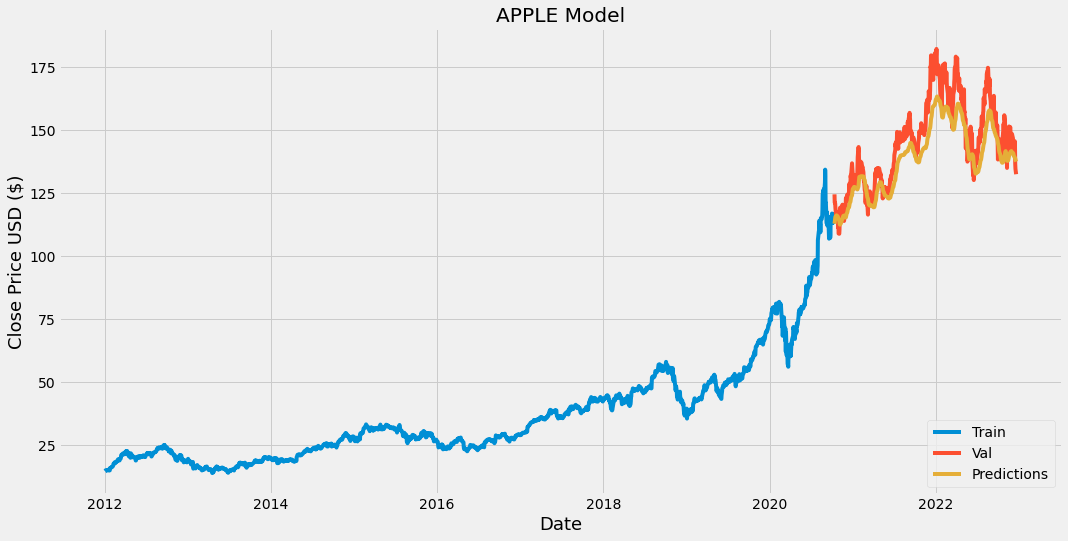

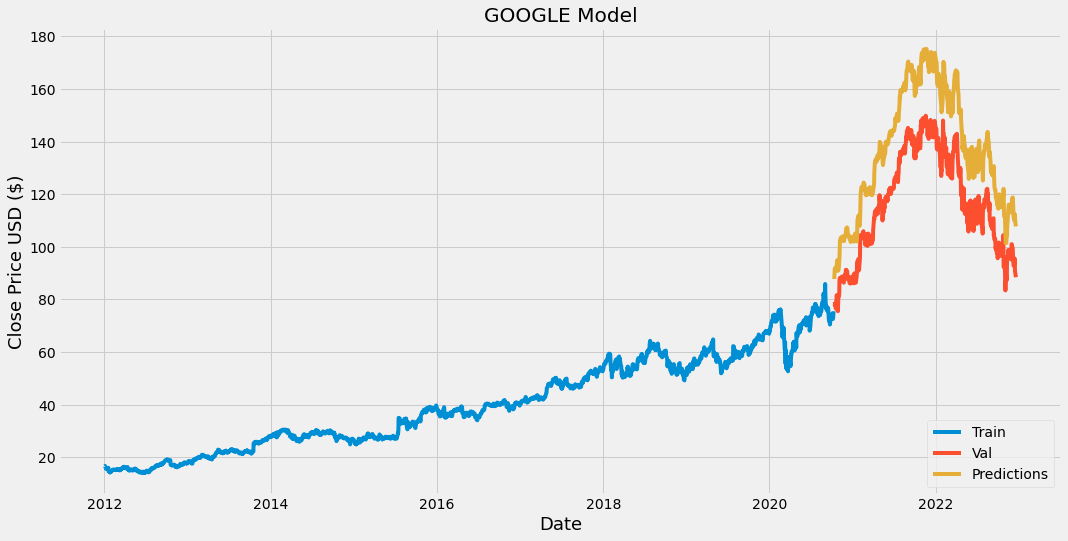

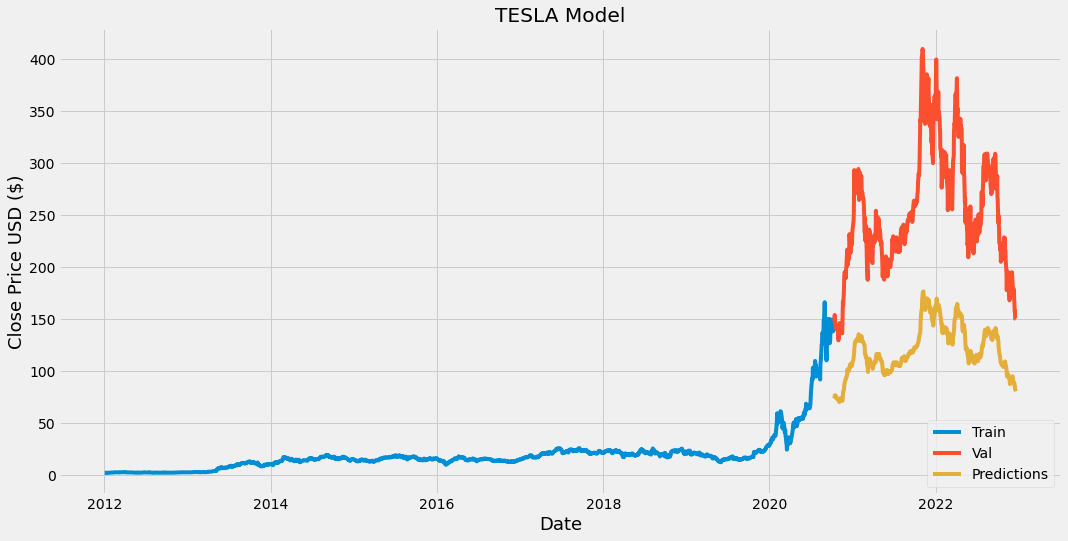

In [ ]:
#Plot the data

train = data[:training_data_len]
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

train2 = data2[:training_data_len]
valid2 = data2[training_data_len:].copy()
valid2['Predictions'] = predictions2

train3 = data3[:training_data_len]
valid3 = data3[training_data_len:].copy()
valid3['Predictions'] = predictions3

#Visualize APPLE data

plt.figure(figsize =(16,8))
plt.title('APPLE Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)' , fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

#Visualize GOOGLE data

plt.figure(figsize =(16,8))
plt.title('GOOGLE Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)' , fontsize = 18)
plt.plot(train2['Close'])
plt.plot(valid2[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

#Visualize TESLA data

plt.figure(figsize =(16,8))
plt.title('TESLA Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)' , fontsize = 18)
plt.plot(train3['Close'])
plt.plot(valid3[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid
valid2
valid3